In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def get_repo_dir():
    cwd = os.getcwd()
    splited = cwd.split('/')
    ind = splited.index('fsCounter')
    repo_dir = '/'
    for s in splited[1:ind + 1]:
        repo_dir = os.path.join(repo_dir, s)

    return repo_dir

In [3]:
sys.path.append(get_repo_dir())

In [4]:
from vision.tools.video_wrapper import video_wrapper
from vision.tools.camera import stretch, fsi_from_channels, stretch_rgb

In [5]:
def init_clips(folder_path, side=1, rotate=1):
    
    rgb_path = os.path.join(folder_path, f"Result_RGB_{side}.mkv")
    c_975_path = os.path.join(folder_path, f"Result_975_{side}.mkv")
    c_800_path = os.path.join(folder_path, f"Result_800_{side}.mkv")
    fsi_path = os.path.join(folder_path, f"Result_FSI_{side}.mkv")
    
    rgb_cam = video_wrapper(rgb_path, rotate=rotate)
    c_975_cam = video_wrapper(c_975_path, rotate=rotate)
    c_800_cam = video_wrapper(c_800_path, rotate=rotate)
    fsi_cam = video_wrapper(fsi_path, rotate=rotate)
    
    return rgb_cam, c_975_cam, c_800_cam, fsi_cam
    

In [6]:
def get_frames(frame_id, rgb_cam, c_975_cam, c_800_cam, fsi_cam):

    _, rgb_img = rgb_cam.get_frame(frame_id)
    _, c_975_img = c_975_cam.get_frame(frame_id)
    _, c_800_img = c_800_cam.get_frame(frame_id)
    _, fsi_img = fsi_cam.get_frame(frame_id)
    
    return rgb_img, c_975_img, c_800_img, fsi_img

In [7]:
def get_file_list(folder_path):
    
    temp_list = os.listdir(folder_path)
    final_list = []
    for file in temp_list:
        temp = file.split('.')[-1]
        if temp == 'jpg' or temp == 'JPG'or temp == 'png':
            final_list.append(file)
            
    return final_list


def load_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)
        
def plot_two_img(img1, img2):
    f, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].imshow(img1)
    ax[1].imshow(img2)

In [8]:
#folder_path = "/home/yotam/FruitSpec/Data/DWDB_Jan_2023/DWDBCN51/R21"
#folder_path = "/home/yotam/FruitSpec/Data/DWDB_Jan_2023/DWDBLE33/R11A"
folder_path = "/home/matan/FruitSpec/Sandbox/Counter/auto_exposure/MidLeft_5K-ALL"
rgb_cam, c_975_cam, c_800_cam, fsi_cam = init_clips(folder_path, side=1)

In [9]:
frame_id = 220
rgb_img, c_975_img, c_800_img, fsi_img = get_frames(frame_id, rgb_cam, c_975_cam, c_800_cam, fsi_cam)

In [10]:
fsi_img = cv2.cvtColor(fsi_img, cv2.COLOR_BGR2RGB)
#c_975_img = c_975_img[:,:,0].copy()
#c_800_img = c_800_img[:,:,0].copy()

In [11]:
new_fsi, rgb = fsi_from_channels(rgb_img, c_800_img, c_975_img)
new_fsi.shape

(2048, 1536, 3)

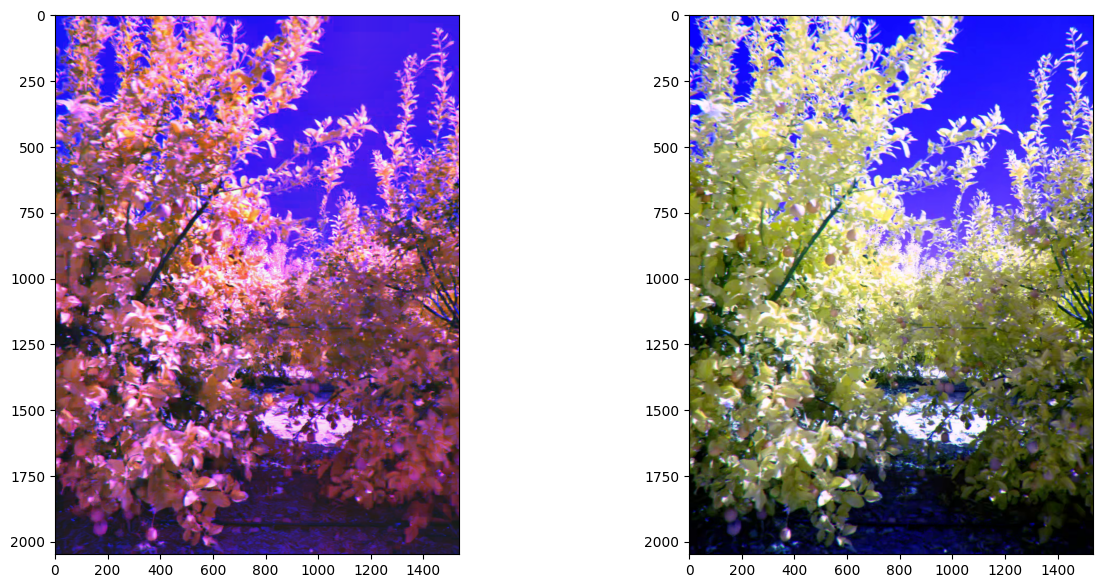

In [12]:
plot_two_img(new_fsi, fsi_img)

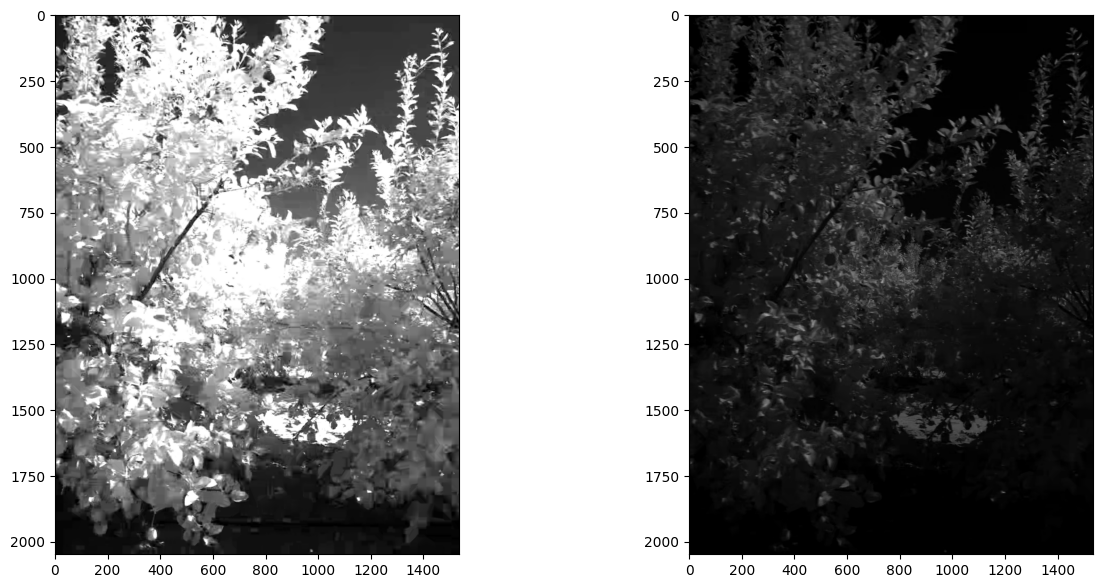

In [15]:
plot_two_img(c_800_img, c_975_img)

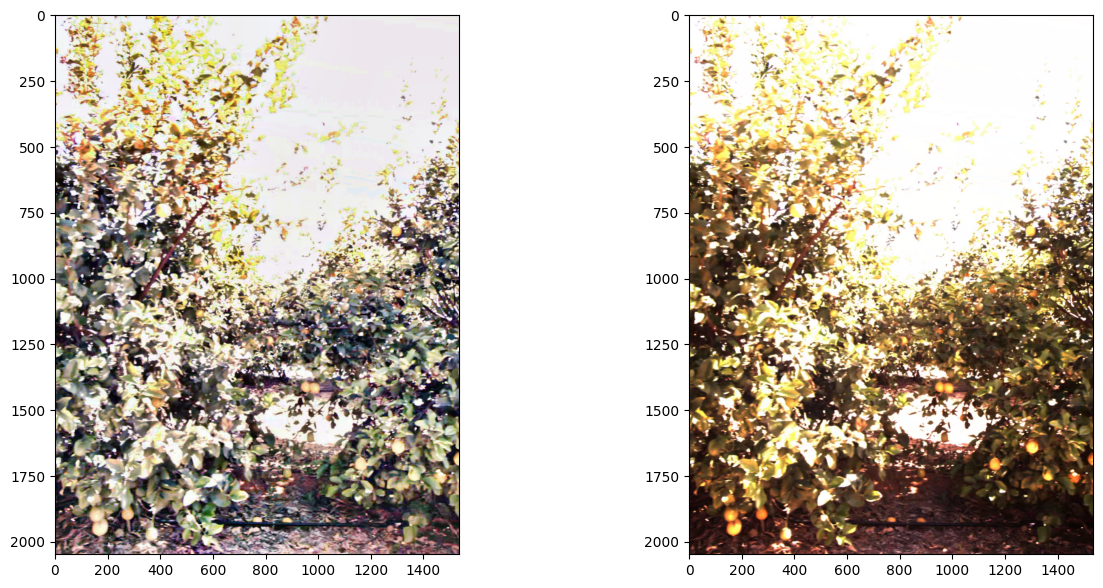

In [13]:
clahe = cv2.createCLAHE(5,(10, 10))
s_rgb = stretch_rgb(rgb_img, 0.02, 0.98, 25, 235, clahe)

f_rgb = s_rgb.copy()
f_rgb[:,:,0] = clahe.apply(s_rgb[:,:,0])
f_rgb[:,:,1] = clahe.apply(s_rgb[:,:,1])
f_rgb[:,:,2] = clahe.apply(s_rgb[:,:,2])

plot_two_img(s_rgb, rgb_img)

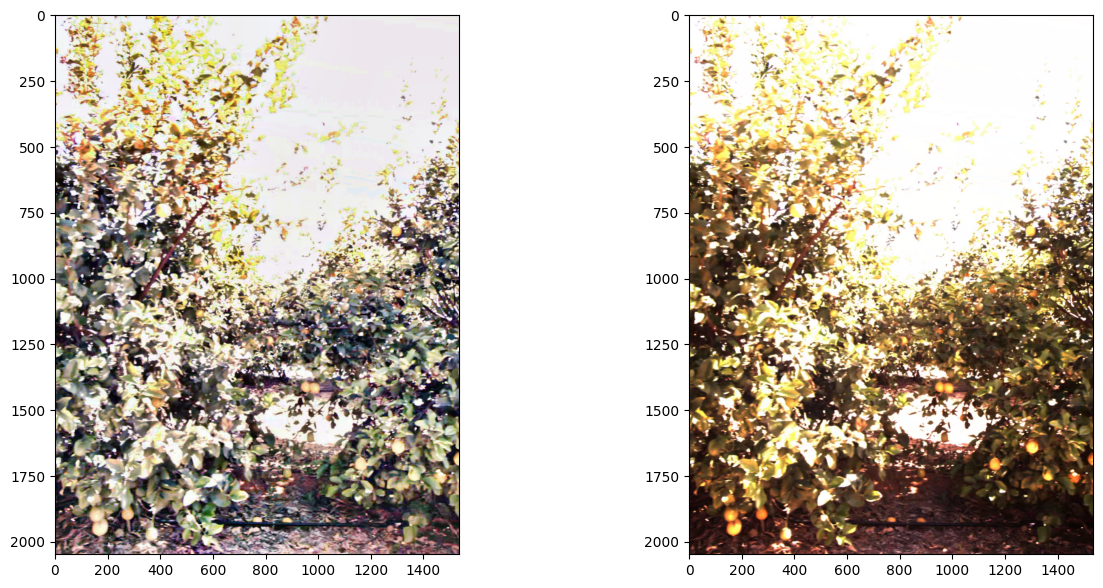

In [17]:
plot_two_img(s_rgb, rgb_img)

In [ ]:
s_rgb = stretch(rgb_img, 0.02, 0.98, 25, 235)
s_800_img = stretch(c_800_img, 0.02, 0.98, 25, 235)
s_975_img = stretch(c_975_img, 0.02, 0.98, 25, 235)

In [ ]:
clahe = cv2.createCLAHE(2,(10, 10))
f_800_img = clahe.apply(s_800_img)
f_975_img = clahe.apply(s_975_img)

In [ ]:
f_img = s_rgb.copy()
f_img[:,:,0] = f_800_img.copy()
f_img[:,:,1] = f_975_img.copy()

plot_two_img(f_img, fsi_img)

In [ ]:
_ = plt.hist(c_975_img.flatten(),256)

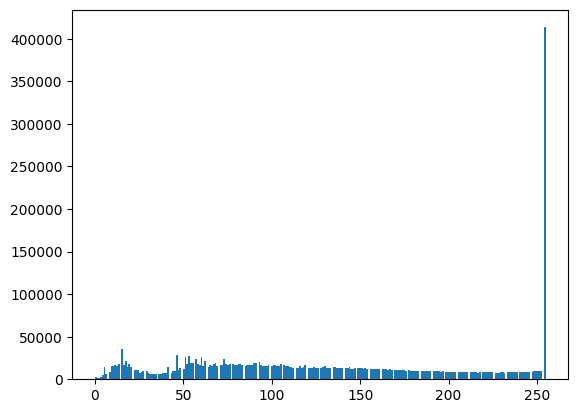

In [16]:
_ = plt.hist(c_800_img[:,:,0].flatten(),256)

In [ ]:
_ = plt.hist(rgb_img[:,:,1].flatten(),256)

In [ ]:
_ = plt.hist(s_800_img.flatten(),256)

In [ ]:
plot_two_img(s_800_img, c_800_img)

In [ ]:
_ = plt.hist(s_975_img.flatten(),256)

In [ ]:
plot_two_img(s_975_img, c_975_img)

In [ ]:
clahe = cv2.createCLAHE(2,(10, 10))
f_800_img = clahe.apply(s_800_img)
f_975_img = clahe.apply(s_975_img)

In [ ]:
plot_two_img(f_975_img, c_975_img)

In [ ]:
_ = plt.hist(f_800_img.flatten(),256)

In [ ]:
plot_two_img(f_975_img, c_975_img)

In [ ]:
_ = plt.hist(f_975_img.flatten(),256)

In [ ]:
f_img = s_rgb.copy()
f_img[:,:,0] = f_800_img.copy()
f_img[:,:,1] = f_975_img.copy()

plot_img(f_img)